## <i> <span style='color:red'>RANDOM FOREST-COMPANY DATA</i></span>

### PROBLEM STATMENT: A cloth manufacturing company is interested to know about the segment or attributes which causes high sale, using Random forest.  

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Checking the basic info from the data

In [3]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


### To check which among them are the fasting moving products based on the sales ,by taking the salestype by considering the sales greater than the average

In [6]:
company["salestype"]=(company["Sales"]>7.49)*1

In [7]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


### Label encoding for categorical values

In [8]:
label_encoder=preprocessing.LabelEncoder()
company["ShelveLoc"]=label_encoder.fit_transform(company["ShelveLoc"])
company["Urban"]=label_encoder.fit_transform(company["Urban"])
company["US"]=label_encoder.fit_transform(company["US"])

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


### Taking all the independent variables for model creation 

In [10]:
x=company.iloc[:,1:9]

In [11]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


### Data frame for target variable

In [12]:
y=company.iloc[:,-1].values

In [13]:
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

### Model validation technique - k-fold cross validation 

In [14]:
kfold=KFold(n_splits=10,random_state=42)

### Model building in  Random forest classfier 

In [15]:
model = RandomForestClassifier(n_estimators=110, max_features=5)

### Evaluating the cross validation score while fitting the model to the validation fold

In [16]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8074999999999999


### Splitting for training and testing

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Model fitting with train data

In [18]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=110)

### Model prediction in train data

In [19]:
Y_pred=model.predict(x_train)

In [20]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


### Identifying the  accuracy

In [21]:
model.score(x_train, y_train)

1.0

### Model prediction for test data

In [22]:
y_pred=model.predict(x_test)

In [23]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8583333333333333


###  Test accuracy score

In [24]:
model.score(x_test, y_test)

0.8583333333333333

In [25]:
model.predict([[110,100,4,466,97,2,55,14,]])

array([1])

### Identifying the important features that contribute to the output and sorting it in ascending order

In [26]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Price          0.280433
CompPrice      0.135805
Age            0.133643
Income         0.109192
Advertising    0.103688
ShelveLoc      0.101599
Population     0.084979
Education      0.050662
dtype: float64

### Bar plot -To show the important features

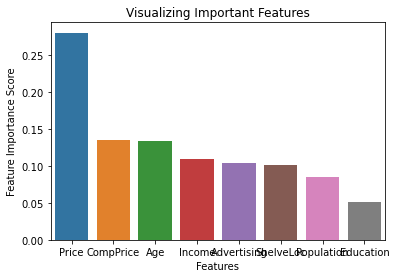

In [27]:
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()


### Looping function for checking the Random forest classifier in different maximum features

In [28]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=115, max_features=6)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### Listing the accuracies based on different maximum feature in both training and testing

In [29]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.850000
1,2,1.0,0.850000
2,3,1.0,0.825000
3,4,1.0,0.883333
4,5,1.0,0.858333
5,6,1.0,0.850000
6,7,1.0,0.850000
7,8,1.0,0.866667
8,9,1.0,0.841667


### Visualization using maximum features

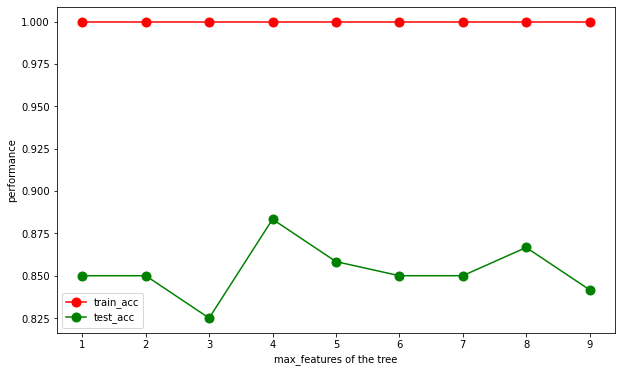

In [30]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o',markersize=9,color='red')
plt.plot(data['max_features'], data['test_acc'], marker = 'o',markersize=9,color='green')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

## Inference:The Random forest classifier with the maximum feature as two gives the highest  accuracy of 84.16%. So it is a good model  to know about the segment or attributes which causes high sale in manufacturing company, using Random forest.
